In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [26]:
# import data from csv file
df = pd.read_csv('churn.csv', index_col= 0)

# show the first 5 row
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. EDA (Exploratory Data Analysis)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [25]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 2.3 Corelation Matrix

<AxesSubplot:>

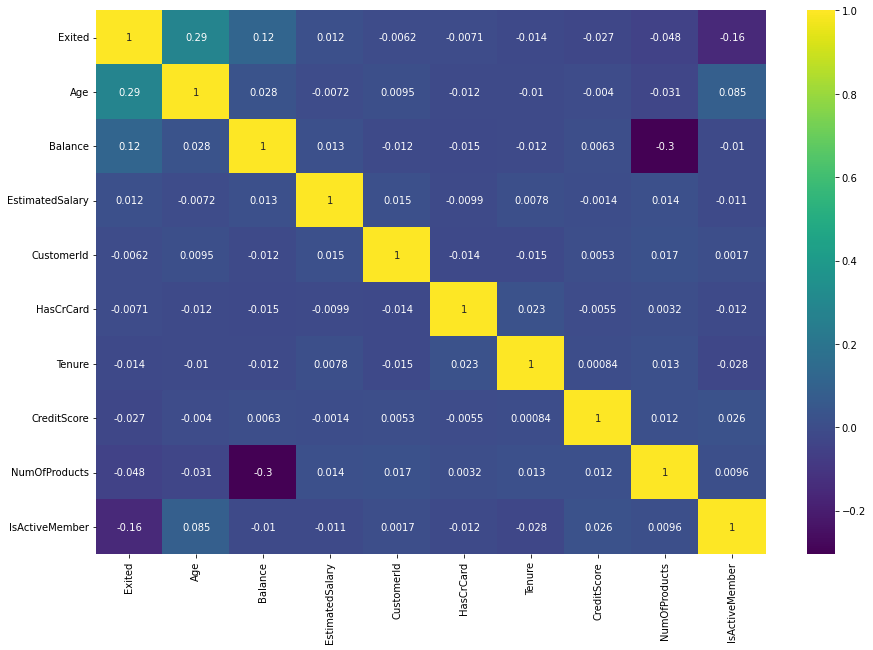

In [32]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## 3. Data Preprocessing 

### 3.1 Missing Value

In [33]:
# Check missing value
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3.2 Outliers filtering

In [35]:
def outlier_thresholds(df, var, low_quantile = 0.05, up_quantile = 0.95):
    """
    Define the threshold value for outliers.

    Args:
        df (dataframe): dataframe.
        var (str): column name.
        low_quantile (int): define low quantile.
        up_quantile (int): define up quantile.

    Returns:
        lower threshole, upper threshold

    Example:
        limit = quantile +- 1.5 * interquantile

    """
    quantile_one = df[var].quantile(low_quantile)
    quantile_three = df[var].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [55]:
def outlier_finder(df, numerical_columns, plot = False):
    for col in numerical_columns:
        low_limit, up_limit = outlier_thresholds(df, col)
        if df[(df[col]>up_limit) | (df[col]<low_limit)].any(axis = None):
            number_of_outliers = df[(df[col]>up_limit) | (df[col]<low_limit)].shape[0]
            print(col, ":", number_of_outliers, "outliers")
            if plot:
                sns.boxplot(x = df[col])
                plt.show()

In [45]:
numeric_variables = ["CreditScore", "Age","Tenure", "Balance", "EstimatedSalary"]

In [56]:
for var in numeric_variables:
    print(var, "has " , outlier_finder(df, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Tenure has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers
